In [1]:
import torch
import pandas as pd

tnn = torch.nn
top = torch.optim

## Study-Sleep dataset

In [2]:
study = [2, 4, 6, 8, 10, 2, 4, 6, 8, 10, 2, 4, 6, 8, 10, 2, 4, 6, 8, 10, 2,  4,  6,  8,  10]
sleep = [2, 2, 2, 2, 2,  4, 4, 4, 4, 4,  6, 6, 6, 6, 6,  8, 8, 8, 8, 8,  10, 10, 10, 10, 10]
marks = [43, 52, 59, 53, 65, 57, 60, 70, 66, 61, 60, 67, 78, 86, 75, 59, 76, 74, 84, 90, 53, 66, 79, 70, 72]

ip_data = torch.tensor([study, sleep]).t() / 24
op_data = torch.tensor([marks]).t() / 100

## NN definition

In [3]:
device = "cpu"

model = tnn.Sequential(
            tnn.Linear(2, 3),
            tnn.Sigmoid(),
            tnn.Linear(3, 1),
            tnn.Sigmoid()
        )
loss_fn = tnn.MSELoss()
optim = top.Adam(model.parameters(), lr=0.1)

## Training loop

<Axes: >

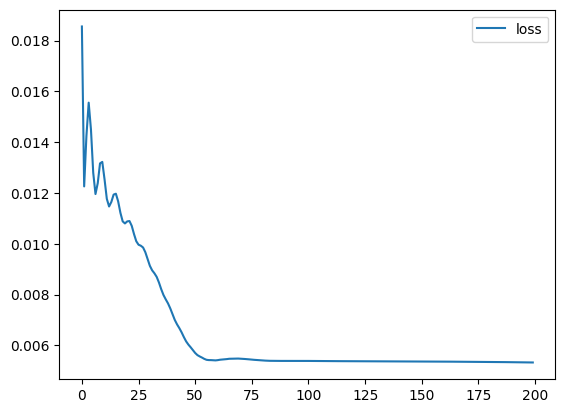

In [4]:
loss_vals = []
for i in range(200):
    op_prd = model(ip_data)
    
    loss_val = loss_fn(op_prd, op_data)
    loss_vals.append(loss_val.item())
    
    # set gradients to 0
    optim.zero_grad()
    # backpropagate loss and set gradients
    loss_val.backward()
    # update params
    optim.step()
    
df = pd.DataFrame({'loss': loss_vals})
df.plot()

## Test

In [5]:
with torch.no_grad():
    x = torch.tensor([[6, 6]]) / 24
    print(model(x) * 100)

tensor([[68.5507]])


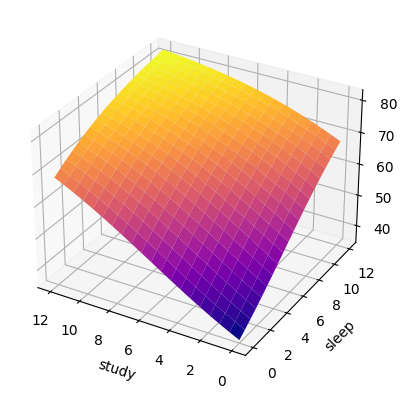

In [6]:
from matplotlib import pyplot as plt
from matplotlib import cm

xs = torch.linspace(0, 0.5, 20)
ys = torch.linspace(0, 0.5, 20)
x, y = torch.meshgrid(xs, ys, indexing='xy')
xy = torch.stack((x.reshape((-1, )), y.reshape((-1, ))), 1)

with torch.no_grad():
    z = model(xy).reshape((20, 20))
    
ax = plt.axes(projection='3d')
ax.invert_xaxis()
ax.set_xlabel('study')
ax.set_ylabel('sleep')
ax.set_zlabel('marks')
ax.plot_surface(
    x.numpy() * 24,
    y.numpy() * 24,
    z.numpy() * 100,
    cmap=cm.plasma
)